# Multi-table Datasets - ENRON Archive

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

In [40]:
import sqlite3, pandas as pd

conn = sqlite3.connect("../../assets/datasets/enron.db")

df = pd.read_sql("SELECT * FROM sqlite_master WHERE name = 'EmployeeBase'", con=conn)
print df['sql'].values[0]


CREATE TABLE EmployeeBase (
                  [eid] INTEGER,
  [name] TEXT,
  [department] TEXT,
  [longdepartment] TEXT,
  [title] TEXT,
  [gender] TEXT,
  [seniority] TEXT
                  
                  )


Query the `sqlite_master` table to retrieve the schema of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [12]:
df = pd.read_sql("SELECT * FROM sqlite_master", con=conn)

print "What fields are there?"
print df.columns

print
print

print "Type of each field?"
print df.info()

What fields are there?
Index([u'type', u'name', u'tbl_name', u'rootpage', u'sql'], dtype='object')


Type of each field?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
type        9 non-null object
name        9 non-null object
tbl_name    9 non-null object
rootpage    9 non-null int64
sql         8 non-null object
dtypes: int64(1), object(4)
memory usage: 432.0+ bytes
None


1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [14]:
sql = """
SELECT * FROM EmployeeBase 
LIMIT 5
"""

pd.read_sql(sql, con=conn)

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


Import each of the 3 tables to a Pandas Dataframes

In [33]:
pd.read_sql(".schema EmployeeBase", con=conn)

DatabaseError: Execution failed on sql '.schema EmployeeBase': near ".": syntax error

In [15]:
sql = "SELECT * FROM EmployeeBase"
employee_df = pd.read_sql(sql, con=conn)

sql = "SELECT * FROM MessageBase"
message_df = pd.read_sql(sql, con=conn)

sql = "SELECT * FROM RecipientBase"
recipient_df = pd.read_sql(sql, con=conn)



## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Convert the timestamp column in the messages. When was the oldest message sent? And the newest?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - how many messages have only one recepient?
    - how many messages have >= 5 recepients?
    - what's the highest number of recepients?
    - who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers

In [84]:
employee_df['eid'].size

156

In [87]:
sql = """
SELECT DISTINCT COUNT(*) FROM EmployeeBase
"""

pd.read_sql(sql, con=conn)

,COUNT(*)
0,156


In [96]:
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21635 entries, 0 to 21634
Data columns (total 6 columns):
mid          21635 non-null int64
filename     21635 non-null object
unix_time    21635 non-null int64
subject      21635 non-null object
from_eid     21635 non-null int64
date         21635 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1014.2+ KB


In [97]:

print "# of employees:  %d" % employee_df['eid'].unique().size
print "# of messages: %d" % message_df['mid'].unique().size

# Convert message timestamp to datetime type
message_df['date'] = pd.to_datetime(message_df['unix_time'], unit='s')
print "Newest message: %s" % message_df['date'].max()
print "Oldest message: %s" % message_df['date'].min()

print "How many messages have only one recepient?", message_df.groupby('from_eid').size().apply(lambda count: 0 if count > 1 else 1).sum()
print "How many messages have >= 5 recepients?", message_df.groupby('from_eid').size().apply(lambda count: 0 if count >= 5 else 1).sum()
print "What's the highest number of recepients?", message_df.groupby('from_eid').size().max()
print "Who sent the message with the highest number of recepients? TBD merge!!"

# of employees:  156
# of messages: 21635
Newest message: 2002-06-21 13:37:34
Oldest message: 1998-11-13 04:07:00
How many messages have only one recepient? 2
How many messages have >= 5 recepients? 5
What's the highest number of recepients? 1597
Who sent the message with the highest number of recepients? TBD merge!!


Rescale to investigate the tail of the curve

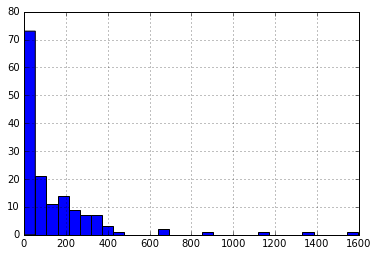

In [91]:
%matplotlib inline

message_df.groupby('from_eid').count()['mid'].hist(bins=30)

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

Also answer the following questions regarding received messages

- Who is receiving more emails? Men or Women?
- Who is receiving more emails? Juniors or Seniors?
- Which department is receiving more emails? How does that relate with the number of employees in the department?
- Who are the top 5 receivers of emails? (people who received the most emails)

Which employees sent the most 'mass' emails?

Keep exploring the dataset, which other questions would you ask?

Work in pairs. Give each other a challenge and try to solve it.